# Credit Card Transactions Fraud Detection Dataset

**This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.**

 Import the required libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train = pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")
test = pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")

In [4]:
train.shape

(1296675, 23)

In [5]:
train.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
test.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [9]:

categorical = train.select_dtypes(include = 'object').columns
train[categorical] = train[categorical].astype('category')

In [10]:
test.shape

(555719, 23)

In [11]:
train.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [12]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [14]:
#Convert date Object to datetime format
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

In [15]:
# train['trans_hour'] = train['trans_date_trans_time'].dt.hour
# #deriving 'day of the week'
# train['trans_day_of_week'] = train['trans_date_trans_time'].dt.day_name()
# #deriving 'year_month'
# train['trans_year_month'] = train['trans_date_trans_time'].dt.to_period('M')

# df.head()

In [16]:
train['date_year'] = train['trans_date_trans_time'].dt.year   #Extract Year
#train['date_month_num'] = train['trans_date_trans_time'].dt.month     #Extract Month
train['date_month'] = train['trans_date_trans_time'].dt.month_name() #Extract Month Name
#df1['date_week'] = df1['date'].dt.dayofweek  #Extract Day of Week
#df1['date_day'] = df1['date'].dt.day_name()  #Extract Day
train['Hours'] = train['trans_date_trans_time'].dt.hour #extract the hour

In [17]:
train["is_fraud"] = train["is_fraud"].astype('category')
train["date_year"] = train["date_year"].astype('category')

In [18]:
train.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date_year,date_month,Hours
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019,January,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019,January,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019,January,0


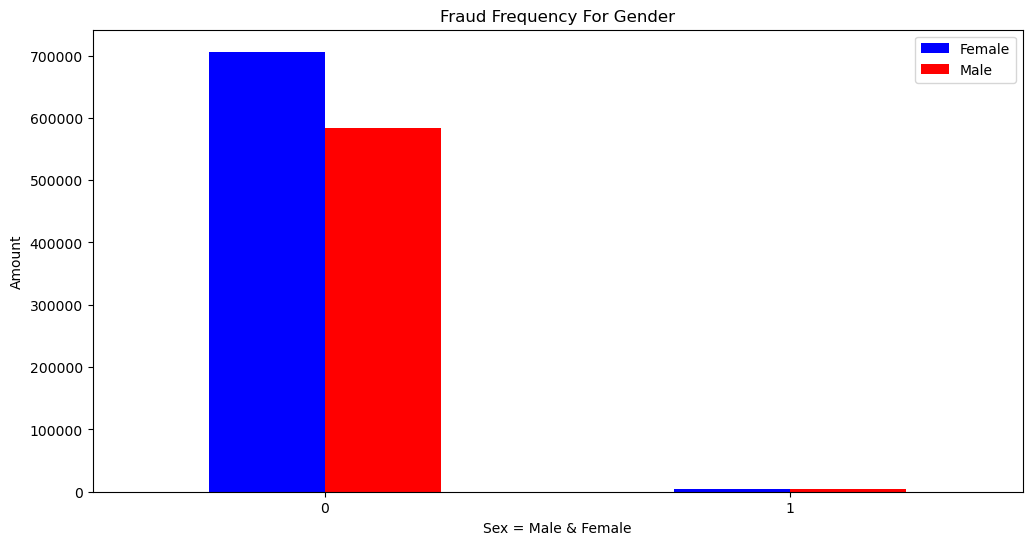

In [19]:
pd.crosstab(train.is_fraud, train.gender).plot(kind="bar",
                                          color=["blue","red"],
                                          figsize=(12,6))

plt.title("Fraud Frequency For Gender")
plt.xlabel("Sex = Male & Female")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0);

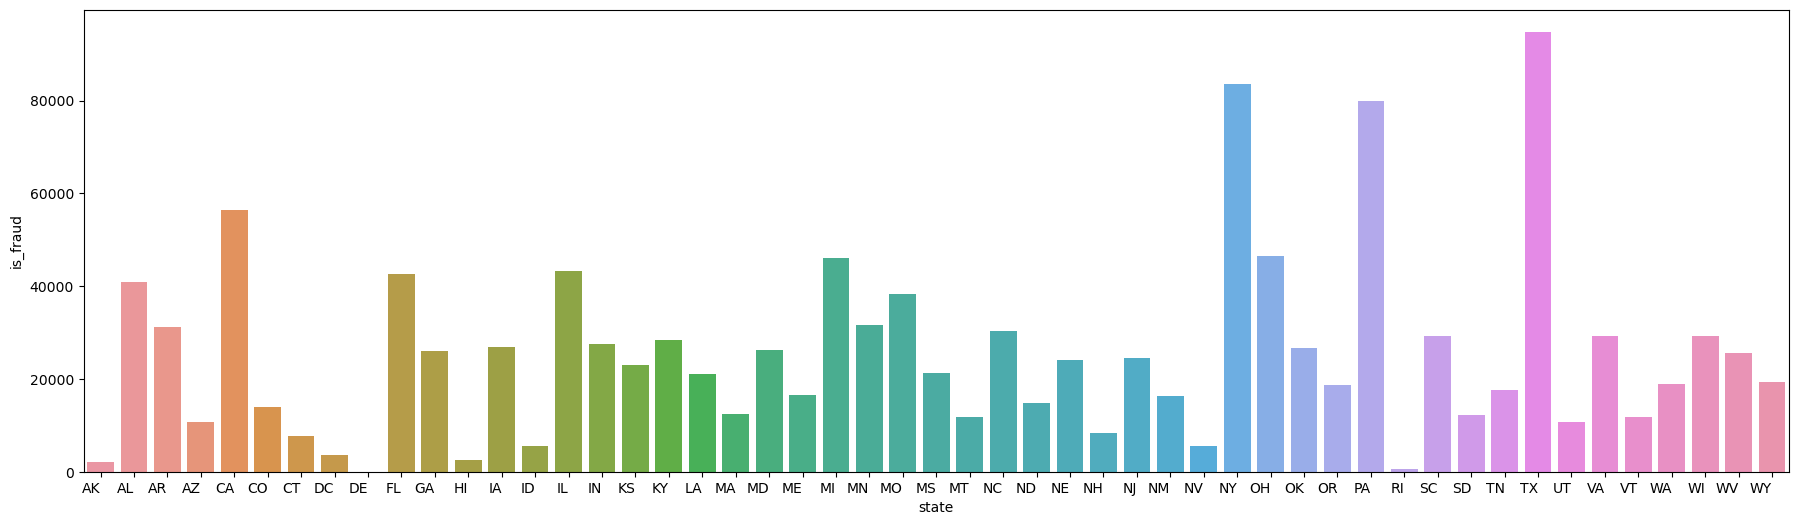

In [20]:
#checking the whitch age reported more fraud:
data=train.groupby('state').agg({'is_fraud':'count'}).reset_index()

fig, (ax1) = plt.subplots(1,1,figsize=(22, 6))
graph =sns.barplot(x='state', y='is_fraud', data = data, ax=ax1)

graph.set_xticklabels(graph.get_xticklabels(),
                    rotation=0,
                    horizontalalignment='right'
                    );

**TX and NY got more frauds**

<Axes: xlabel='category', ylabel='is_fraud'>

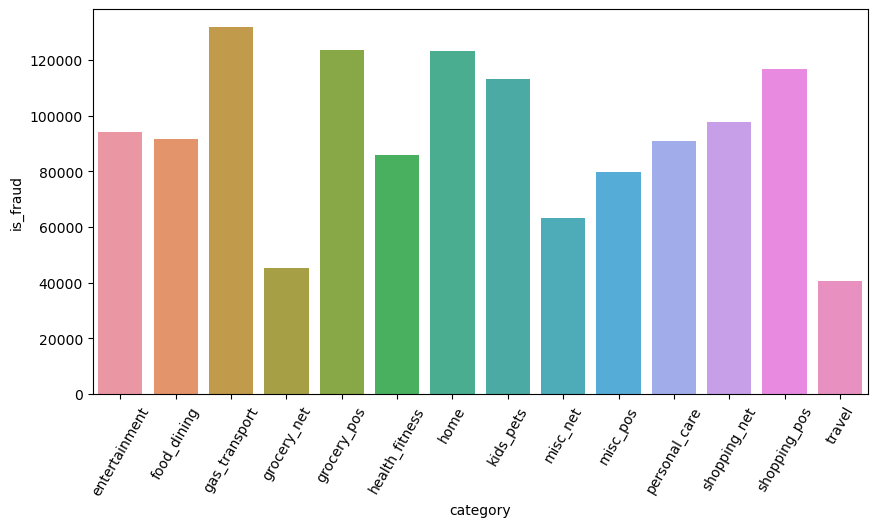

In [21]:
prdata=train.groupby('category').agg({'is_fraud':'count'}).reset_index()
fig, (ax1) = plt.subplots(1,1,figsize=(10, 5))
plt.xticks(rotation=60)
sns.barplot(x='category', y='is_fraud', data = prdata, ax=ax1)

**Gas transport done more fraud**

In [22]:
#dropping variables
train.drop(['trans_date_trans_time','first', 'last', 'dob','cc_num','Unnamed: 0','street','trans_num','zip','city'] , axis=1, inplace=True)
train.head(2)

,merchant,category,amt,gender,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,date_year,date_month,Hours
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,2019,January,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,2019,January,0


In [23]:
train.dtypes

merchant      category
category      category
amt            float64
gender        category
state         category
lat            float64
long           float64
city_pop         int64
job           category
unix_time        int64
merch_lat      float64
merch_long     float64
is_fraud      category
date_year     category
date_month      object
Hours            int64
dtype: object

In [24]:
train.drop(['lat','city_pop', 'job', 'merch_lat','merch_long','long','merchant'] , axis=1, inplace=True)


In [25]:
# Importing the required libraries to perform pre-processing in train data and splitting into train-test split:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [26]:
# Dropping the target variable from train data and storing the rest of the attributes in "X" and target attribute in "y":
X = train.drop(["is_fraud"], axis = 1)
y = train["is_fraud"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123,stratify=y)

In [28]:
import seaborn as sns #visualisations
import matplotlib.pyplot as plt #for visualisation

<Axes: xlabel='is_fraud', ylabel='count'>

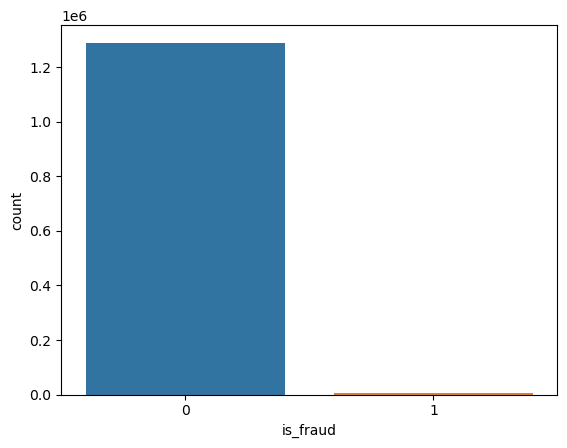

In [29]:
# Observing target variable counts through bargraph:
sns.countplot(x='is_fraud',data=train)

In [30]:
#defining numerical columns in data:
numeric_columns=train.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['amt', 'unix_time', 'Hours'], dtype='object')

In [31]:
#defining categorical columns in data:
cat_columns=X_train.select_dtypes(['category','object']).columns
cat_columns

Index(['category', 'gender', 'state', 'date_year', 'date_month'], dtype='object')

In [32]:
# Importing the required classifiers for model building:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 

In [33]:
#standardscaler for numerical columns
scaler = StandardScaler()
scaler.fit(X_train[numeric_columns])

X_train_num = pd.DataFrame(scaler.transform(X_train[numeric_columns]), columns=numeric_columns)
X_test_num = pd.DataFrame(scaler.transform(X_test[numeric_columns]), columns=numeric_columns)

In [34]:
#ohe = OneHotEncoder()
ohe = OneHotEncoder(handle_unknown='ignore', drop = "first")
ohe.fit(X_train[cat_columns])

columns_ohe = list(ohe.get_feature_names_out(cat_columns))

In [35]:
X_train_cat = ohe.transform(X_train[cat_columns])
X_test_cat  = ohe.transform(X_test[cat_columns])

In [36]:
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat  = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

In [37]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [38]:
#checking the shape of train and test:
print(X_train.shape, X_test.shape)

(907672, 79) (389003, 79)


In [39]:
scores = pd.DataFrame(columns=['Model', 'Train_Recall', 'Train_Precision', 'Train_F1_Score', 
                               'Test_Recall', 'Test_Precision', 'Test_F1_Score'])

def get_metrics(train_actual, train_predicted, test_actual, test_predicted, model_description, dataframe):

    train_recall    = recall_score(train_actual, train_predicted, average="weighted")
    train_precision = precision_score(train_actual, train_predicted, average="weighted")
    train_f1score   = f1_score(train_actual, train_predicted, average="weighted")
    
    test_recall     = recall_score(test_actual, test_predicted, average="weighted")
    test_precision  = precision_score(test_actual, test_predicted, average="weighted")
    test_f1score    = f1_score(test_actual, test_predicted, average="weighted")

    dataframe       = dataframe.append(pd.Series([model_description, 
                                                train_recall, train_precision, train_f1score,
                                                test_recall, test_precision, test_f1score],
                                                 index=scores.columns ), 
                                       ignore_index=True)

    return(dataframe)

In [40]:
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

# LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logistic_model = LogisticRegression(solver='liblinear',random_state=1230)

In [43]:
Model=logistic_model.fit(X_train,y_train)

In [44]:
y_train_Pred_log = logistic_model.predict(X_train)
y_test_Pred_log = logistic_model.predict(X_test)

In [45]:
y_pred = logistic_model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmr = confusion_matrix(y_test, y_pred)
print(cmr)

[[386587    164]
 [  2248      4]]


In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.50067607674451

In [48]:
classifcation_report_train_test(y_train, y_train_Pred_log, y_test, y_test_Pred_log)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9942    0.9996    0.9969    902418
           1     0.0241    0.0019    0.0035      5254

    accuracy                         0.9938    907672
   macro avg     0.5092    0.5007    0.5002    907672
weighted avg     0.9886    0.9938    0.9911    907672


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9942    0.9996    0.9969    386751
           1     0.0238    0.0018    0.0033      2252

    accuracy                         0.9938    389003
   macro avg     0.5090    0.5007    0.5001    389003
weighted avg     0.9886    0.9938    0.9911    389003



In [49]:
scores=get_metrics(y_train,y_train_Pred_log,y_test,y_test_Pred_log,"Logistic",scores)
scores

/tmp/ipykernel_96/3559094045.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe       = dataframe.append(pd.Series([model_description,


,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.993776,0.988604,0.991129,0.9938,0.988601,0.991138


From the above dataframe it can be seen that although we have not balanced the classes in our target variable, the accuracy and several other metrics seem to look great.
This is because, since there is no balance in the dataset at this point, the model predicts almost all data points as 'not fraud'.
This does not clearly satify our motive hence, we need to balance the classes in the target variable in order build a fair model.

# LogisticRegression using smote

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)

In [51]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [52]:
X_train_sm.shape

(1804836, 79)

In [53]:
lr = LogisticRegression(random_state=42)

In [54]:
Model3=lr.fit(X_train_sm, y_train_sm)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
y_train_pred = Model3.predict(X_train_sm)
y_train_pred

array([0, 0, 1, ..., 0, 1, 1])

In [56]:
y_test_Pred_log = Model3.predict(X_test)

In [57]:
classifcation_report_train_test(y_train_sm, y_train_pred, y_test, y_test_Pred_log)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.7901    0.8766    0.8311    902418
           1     0.8614    0.7672    0.8115    902418

    accuracy                         0.8219   1804836
   macro avg     0.8258    0.8219    0.8213   1804836
weighted avg     0.8258    0.8219    0.8213   1804836


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9985    0.8771    0.9339    386751
           1     0.0351    0.7673    0.0671      2252

    accuracy                         0.8765    389003
   macro avg     0.5168    0.8222    0.5005    389003
weighted avg     0.9929    0.8765    0.9289    389003



In [58]:
scores=get_metrics(y_train_sm, y_train_pred, y_test, y_test_Pred_log,"Logistic_smote",scores)
scores

/tmp/ipykernel_96/3559094045.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe       = dataframe.append(pd.Series([model_description,


,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.993776,0.988604,0.991129,0.993800,0.988601,0.991138
1,Logistic_smote,0.821855,0.825755,0.821321,0.876505,0.992881,0.928858


# RandomForestClassifier_smote

In [59]:
rfclf2 = RandomForestClassifier(class_weight='balanced')

In [60]:
rfclf2 = rfclf2.fit(X_train_sm, y_train_sm)

In [61]:
train_pred=rfclf2.predict(X_train_sm)
test_pred=rfclf2.predict(X_test)

In [62]:
classifcation_report_train_test(y_train_sm, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    902418
           1     1.0000    1.0000    1.0000    902418

    accuracy                         1.0000   1804836
   macro avg     1.0000    1.0000    1.0000   1804836
weighted avg     1.0000    1.0000    1.0000   1804836


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9986    0.9993    0.9990    386751
           1     0.8675    0.7562    0.8081      2252

    accuracy                         0.9979    389003
   macro avg     0.9331    0.8778    0.9035    389003
weighted avg     0.9978    0.9979    0.9978    389003



In [63]:
scores=get_metrics(y_train_sm,train_pred,y_test,test_pred,"Random forest_smote",scores)
scores

/tmp/ipykernel_96/3559094045.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe       = dataframe.append(pd.Series([model_description,


,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.993776,0.988604,0.991129,0.993800,0.988601,0.991138
1,Logistic_smote,0.821855,0.825755,0.821321,0.876505,0.992881,0.928858
2,Random forest_smote,1.000000,1.000000,1.000000,0.997920,0.997823,0.997849


# SVM

In [64]:
from sklearn import svm
from sklearn.datasets import make_classification

In [65]:
model = svm.SVC(kernel = 'linear', random_state = 0)

In [66]:
#model.fit(X_train_sm, y_train_sm)

In [ ]:
train_pred=model.predict(X_train_sm)
test_pred=model.predict(X_test)

In [ ]:
classifcation_report_train_test(y_train_sm, train_pred, y_test, test_pred)

In [ ]:
scores=get_metrics(y_train_sm,train_pred,y_test,test_pred,"svm_smote",scores)
scores

# Test data

In [67]:
test.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [68]:
categorical = test.select_dtypes(include = 'object').columns
test[categorical] = test[categorical].astype('category')

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0             555719 non-null  int64   
 1   trans_date_trans_time  555719 non-null  category
 2   cc_num                 555719 non-null  int64   
 3   merchant               555719 non-null  category
 4   category               555719 non-null  category
 5   amt                    555719 non-null  float64 
 6   first                  555719 non-null  category
 7   last                   555719 non-null  category
 8   gender                 555719 non-null  category
 9   street                 555719 non-null  category
 10  city                   555719 non-null  category
 11  state                  555719 non-null  category
 12  zip                    555719 non-null  int64   
 13  lat                    555719 non-null  float64 
 14  long                

In [70]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [71]:
#Convert date Object to datetime format
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

In [72]:
test['date_year'] = test['trans_date_trans_time'].dt.year   #Extract Year
test['date_month'] = test['trans_date_trans_time'].dt.month_name() #Extract Month Name
test['Hours'] = test['trans_date_trans_time'].dt.hour #extract the hour

In [73]:
#dropping variables
test.drop(['trans_date_trans_time','first', 'last', 'dob','cc_num','Unnamed: 0','street','trans_num','zip','city'] , axis=1, inplace=True)
test.head(2)

,merchant,category,amt,gender,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,date_year,date_month,Hours
0,fraud_Kirlin and Sons,personal_care,2.86,M,SC,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0,2020,June,12
1,fraud_Sporer-Keebler,personal_care,29.84,F,UT,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0,2020,June,12


In [74]:
test.drop(['lat','city_pop', 'job', 'merch_lat','merch_long','long','merchant'] , axis=1, inplace=True)


In [82]:
test['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [83]:
test.drop(['is_fraud'],axis = 1, inplace=True)

In [84]:
test.head(3)

,category,amt,gender,state,unix_time,date_year,date_month,Hours
0,personal_care,2.86,M,SC,1371816865,2020,June,12
1,personal_care,29.84,F,UT,1371816873,2020,June,12
2,health_fitness,41.28,F,NY,1371816893,2020,June,12


In [85]:
categorical = test.select_dtypes(include = 'object').columns
test[categorical] = test[categorical].astype('category')

In [86]:
test.dtypes

category      category
amt            float64
gender        category
state         category
unix_time        int64
date_year        int64
date_month    category
Hours            int64
dtype: object

In [92]:
test['date_year'] = test['date_year'].astype('category')

In [93]:
num_cols=test.select_dtypes(['float64','int64']).columns
num_cols

Index(['amt', 'unix_time', 'Hours'], dtype='object')

In [94]:
cat_cols=test.select_dtypes(['category']).columns
cat_cols

Index(['category', 'gender', 'state', 'date_year', 'date_month'], dtype='object')

In [95]:
#standardscaler for numerical columns
scaler = StandardScaler()                                                                                                                                                                                                                                                                                                                    
scaler.fit(test[num_cols])
test_num = pd.DataFrame(scaler.transform(test[num_cols]), columns=num_cols)

In [99]:
test_num

,amt,unix_time,Hours
0,-0.424463,-1.703871,-0.118789
1,-0.252337,-1.703869,-0.118789
2,-0.179353,-1.703865,-0.118789
3,-0.059605,-1.703861,-0.118789
4,-0.422358,-1.703861,-0.118789
...,...,...,...
555714,-0.163467,1.510350,1.496265
555715,0.270803,1.510351,1.496265
555716,0.111564,1.510352,1.496265
555717,-0.391735,1.510354,1.496265


In [96]:
test_cat = ohe.transform(test[cat_cols]) 

In [100]:
test_cat = pd.DataFrame(test_cat.todense(), columns=columns_ohe)

In [101]:
testdata = pd.concat([test_num, test_cat], axis=1)

In [102]:
testdata.shape

(555719, 79)

In [103]:
pred = lr.predict(testdata)

In [104]:
pred.shape

(555719,)

In [105]:
pred=pd.DataFrame(pred)

In [106]:
pred.rename(columns={0:'is_fraud'},inplace=True)

In [107]:
pred.head(5)

,is_fraud
0,0
1,0
2,0
3,0
4,0


In [108]:
pred['is_fraud'].value_counts()

0    551439
1      4280
Name: is_fraud, dtype: int64